# Chargement des données

In [1]:
install.packages("data.table")
install.packages('R.utils')

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jeans\AppData\Local\Temp\RtmpyQRTML\downloaded_packages


also installing the dependencies 'R.oo', 'R.methodsS3'



package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jeans\AppData\Local\Temp\RtmpyQRTML\downloaded_packages


In [2]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [3]:
#fonction permettant de modifier la taille des graphiques
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [4]:
x <- data.table::fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/listings.csv.gz", encoding = "UTF-8")

Warning message in require_bit64_if_needed(ans):
"Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again."

In [5]:
head(x)

id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2577,https://www.airbnb.com/rooms/2577,9.980626e-311,2020-10-19,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, open modern kitchen, cable tv, wifi, sleeping space up to 5 people, Republique area, 5 minutes from the St Martin Canal, Marais area, 10 min from Chatelet and the Louvre.<br /><br /><b>The space</b><br />The district has any service or shop you may desire at a walking distance, many restaurants and clubs as well. <br />I will be pleased to suggest our best addresses and give you directions to have a very enjoyable journey. <br />We have 1 separated bedroom and one mezzanine for the second bed. One bathroom is """"en suite"""" to the main bedroom. <br />Welcome to our beautiful loft!<br />Karine",,https://a0.muscache.com/pictures/09da057c-0120-4d5c-b464-d95c75921dde.jpg,2827,https://www.airbnb.com/users/show/2827,...,10,10,10,,t,1,1,0,0,0.05
3109,https://www.airbnb.com/rooms/3109,9.980626e-311,2020-10-18,zen and calm,<b>The space</b><br />I bedroom appartment in Paris 14,Good restaurants<br />very close the Montparnasse Station<br />15 m from the center of Paris,https://a0.muscache.com/pictures/baeae9e2-cd53-4ac3-b1bc-4055c0bb2e77.jpg,3631,https://www.airbnb.com/users/show/3631,...,10,10,10,,f,1,1,0,0,0.19
4886,https://www.airbnb.com/rooms/4886,9.980626e-311,2020-10-18,Country-Style Studio Hip Area FREE CRUISE & WIFI,"Bright and Cozy Studio Apartment for 2 Guests. Enjoy Great Authentic and Central Location near Canal St Martin and Republique. Historic Building with Elevator. <br />Outdoor Market a block away. Steps to Trendy Rue Oberkampf & Hip Canal St Martin. Minutes to the Marais District or Bastille. 2 Free Ricer Cruise Tix !<br /><br /><b>The space</b><br />2 Free River Cruise Tix with your booking ! Mention this offer with your booking. <br /><br />Studio la Fontaine is a well-equipped country-style 15 sq. meter studio apartment that has a warm and cozy feel. It can sleep up to 2 guests.<br /><br />Located in one of the most loved neighborhoods by hip Parisians and those in the know. <br />Trendy area with many funky shops, well-regarded restaurants and innovative art galleries.<br /><br />Fully furnished and stylishly decorated, this apartment is located in a historic building built in the 18th century with elevator.<br /><br />Located on a very pretty square, your window looks out over t","2 Free River Cruise Tix with your booking ! Mention this offer with your booking.<br /><br />Located on lively Rue Jean Pierre Timbaud in the same building as the famous restaurant """"Astier"""". The street has many authentic restaurants, markets, cafes and bistros to choose from.<br /><br />Located in the 11th Arrondissement (district) on the border of the 3rd, which is the beautiful and fashionable Marais neighborhood.<br />You will be walking distance to all the shopping, cafes, restaurants and museums that"""" Le Marais"""" has to offer.<br /><br />The Canal St Martin is only three minutes away and it is a shady and cool place to relax on a hot summer day with a book and a baguette. Made famous in the movie Amelie, you can see where she skipped stones across the water to relax.<br /><br />You are a 30 minute walk from Notre Dame Cathedral, Isle Saint Louis, the Louvre and the entire heart of Paris. Or take the metro and be there within 10 minutes.",https://a0.muscache.com/pictures/395578/e7f46d40_original.jpg,6792,https://www.airbnb.com/users/show/6792,...,9,10,9,7511101570436,f,11,11,0,0,0.18
4890,https://www.airbnb.com/rooms/4890,9.980626e-311,2020-10-14,Quiet Historic & Cute +Free Cruise,"Stylish & Classi

In [6]:
summary(x)

       id           listing_url          scrape_id  last_scraped       
 Min.   :    2577   Length:66334       Min.   :0   Min.   :2020-10-12  
 1st Qu.:11749304   Class :character   1st Qu.:0   1st Qu.:2020-10-14  
 Median :23665724   Mode  :character   Median :0   Median :2020-10-16  
 Mean   :23785998                      Mean   :0   Mean   :2020-10-16  
 3rd Qu.:36592924                      3rd Qu.:0   3rd Qu.:2020-10-18  
 Max.   :45828064                      Max.   :0   Max.   :2020-10-24  
                                                                       
     name           description        neighborhood_overview picture_url       
 Length:66334       Length:66334       Length:66334          Length:66334      
 Class :character   Class :character   Class :character      Class :character  
 Mode  :character   Mode  :character   Mode  :character      Mode  :character  
                                                                               
                        

In [7]:
dim(x)

[1] 66334    74

# Les quartiers avec le plus d'annonces

In [8]:
neighbour <- x %>% select(neighbourhood_cleansed, host_total_listings_count) %>% filter( host_total_listings_count != is.na( host_total_listings_count)) %>%
group_by(neighbourhood_cleansed) %>% 
summarise(listings = sum(host_total_listings_count)) %>% arrange(listings)

`summarise()` ungrouping output (override with `.groups` argument)


In [9]:
tail(neighbour, 5)

neighbourhood_cleansed,listings
Hôtel-de-Ville,53974
Popincourt,55182
Passy,63027
Temple,67431
Bourse,69119


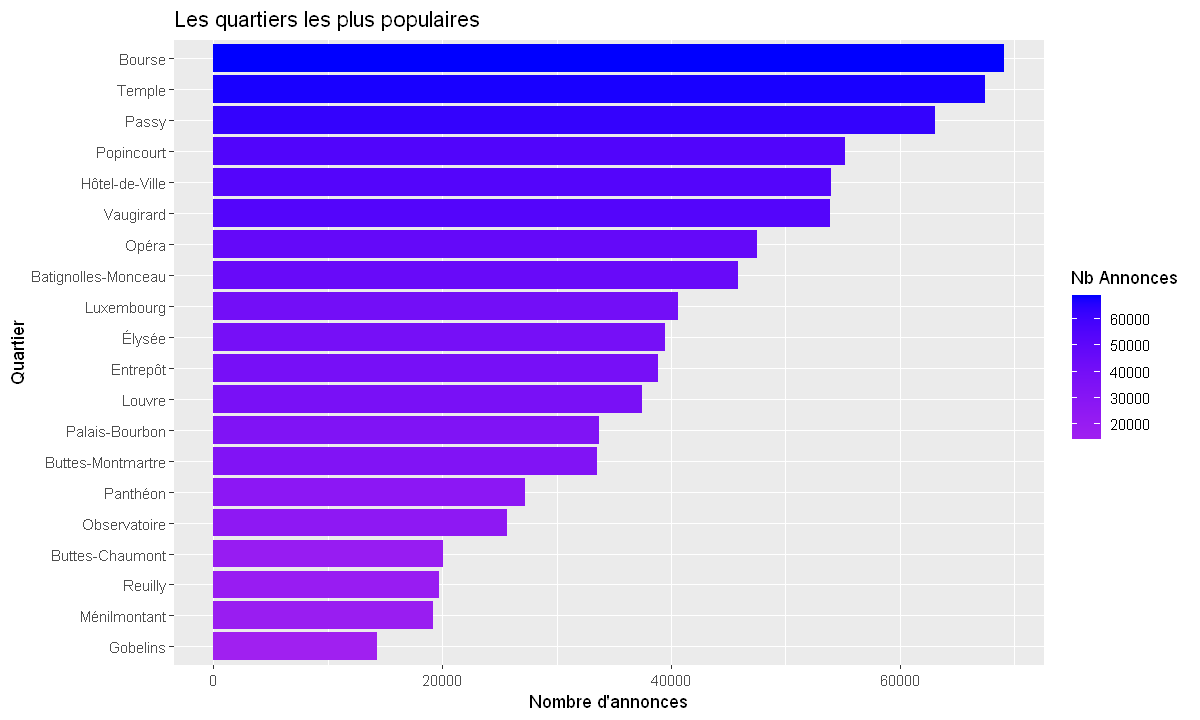

In [10]:
fig(10,6)
neighbour$neighbourhood_cleansed <- factor(neighbour$neighbourhood_cleansed, levels = neighbour$neighbourhood_cleansed[order(neighbour$listings, decreasing = FALSE)])
ggplot(neighbour, aes(neighbourhood_cleansed, listings, fill = listings)) +
geom_col() +
scale_fill_gradient(low = "purple", high = "blue", na.value = NA) +
coord_flip() +
labs(titles = "Les quartiers les plus populaires", x = "Quartier", y = "Nombre d'annonces", fill = "Nb Annonces")


On peut facilement identifier les quartiers où l'offre est la plus forte.

# Type de bien avec le plus d'annonces

In [11]:
property <- x %>% select(property_type, room_type, host_total_listings_count) %>% 
filter( host_total_listings_count != is.na( host_total_listings_count)) %>% 
group_by(property_type, room_type) %>%
summarise(listings = sum(host_total_listings_count)) %>% 
arrange(listings)

`summarise()` regrouping output by 'property_type' (override with `.groups` argument)


In [12]:
property <- tail(property, 7)

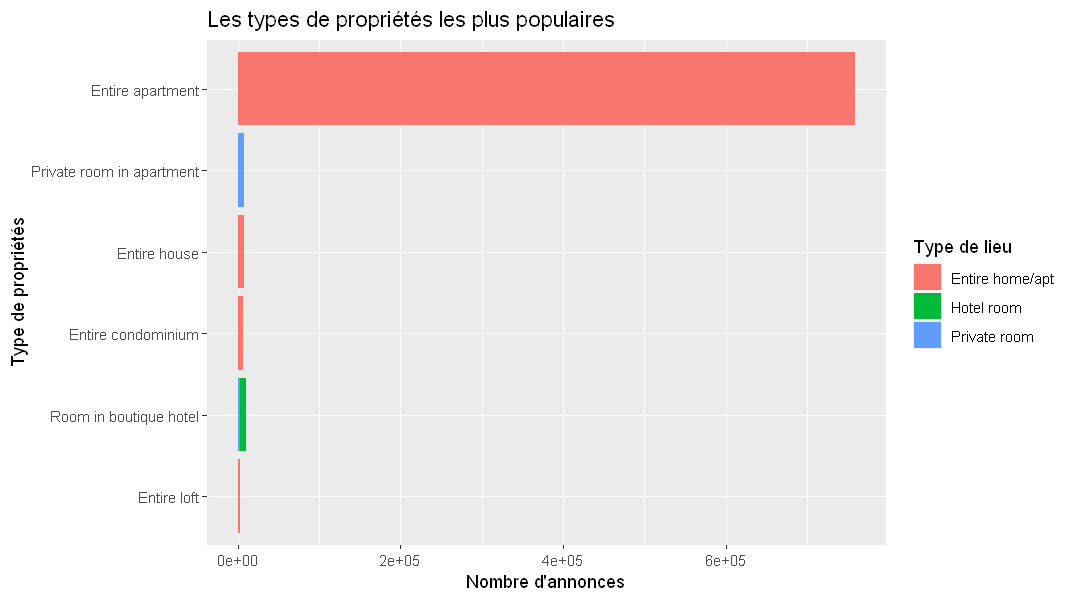

In [13]:
fig(9,5)

ggplot(property, aes(x = reorder(property_type, listings), listings, fill = room_type)) +
geom_col() +
coord_flip() +
labs(titles = "Les types de propriétés les plus populaires", x = "Type de propriétés", y = "Nombre d'annonces", fill = "Type de lieu")

On peut constater que la majorité écrasante des biens louables sont des résidences complètes en appartement.

# Nombre de personnes pouvant être accueillis par nombre d'annonces

In [14]:
accommodate <- x %>% select(accommodates, host_total_listings_count) %>% 
filter( host_total_listings_count != is.na( host_total_listings_count)) %>%
group_by(accommodates) %>% 
summarise(listings = sum(host_total_listings_count))

`summarise()` ungrouping output (override with `.groups` argument)


In [15]:
head(accommodate)

accommodates,listings
0,21
1,7964
2,253550
3,74420
4,262364
5,57724


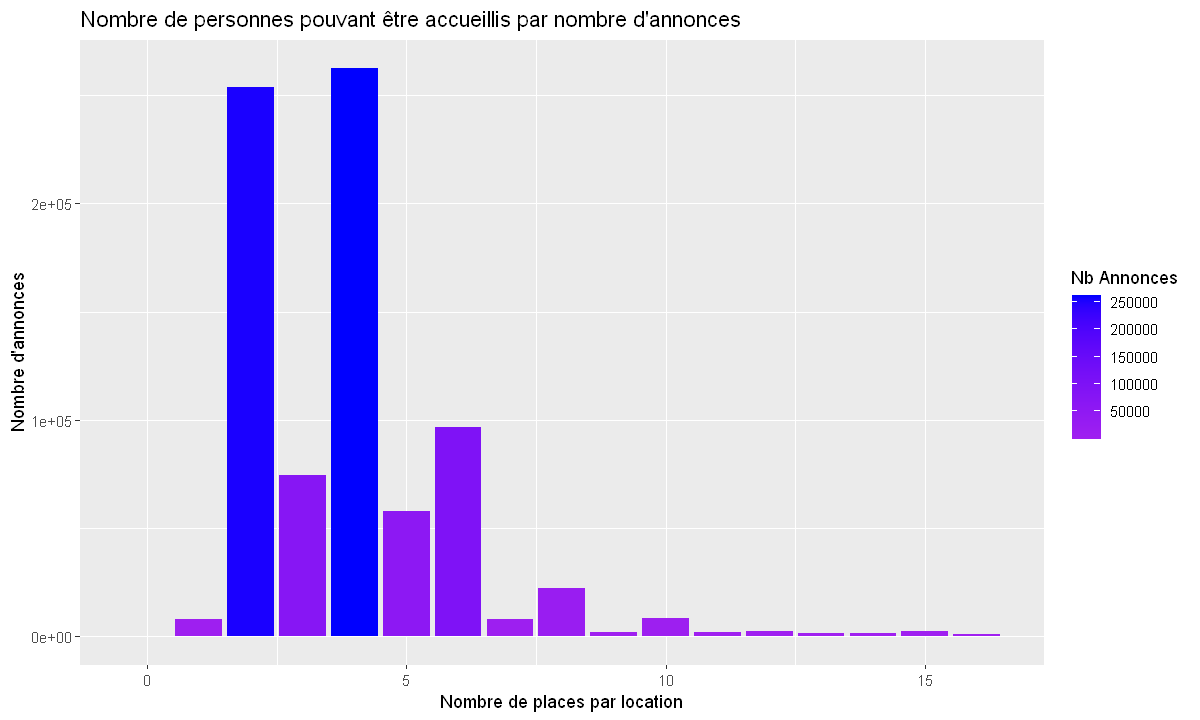

In [16]:
fig(10,6)
ggplot(accommodate, aes(accommodates, listings, fill = listings)) +
geom_col() +
scale_fill_gradient(low = "purple", high = "blue", na.value = NA) +
labs(titles = "Nombre de personnes pouvant être accueillis par nombre d'annonces", x = "Nombre de places par location", y = "Nombre d'annonces", fill = "Nb Annonces") 

Les biens les plus populaires sont les biens pouvant accueillir 2 ou 4 personnes.

On peut estimer que l'offre se concentre sur les couples ou les groupes de couples (on remarque un pic pour chaque multiple de 2).

# Prix moyen de la nuit par quartier pour deux personnes

In [17]:
x$price<-as.numeric(gsub("\\$","",as.character(x$price)))

Warning message in eval(expr, envir, enclos):
"NAs introduits lors de la conversion automatique"

In [18]:
class(x$price)

[1] "numeric"

In [19]:
price <- x %>% select(neighbourhood_cleansed, price, accommodates) %>%
filter(price != is.na(price), accommodates != is.na(price), accommodates == 2) %>%
group_by(neighbourhood_cleansed) %>% 
summarise(prix = mean(price)) %>% arrange(prix)

`summarise()` ungrouping output (override with `.groups` argument)


In [20]:
tail(price)

neighbourhood_cleansed,prix
Passy,93.98501
Hôtel-de-Ville,103.49498
Luxembourg,106.22689
Louvre,106.50641
Palais-Bourbon,111.57806
Élysée,121.40944


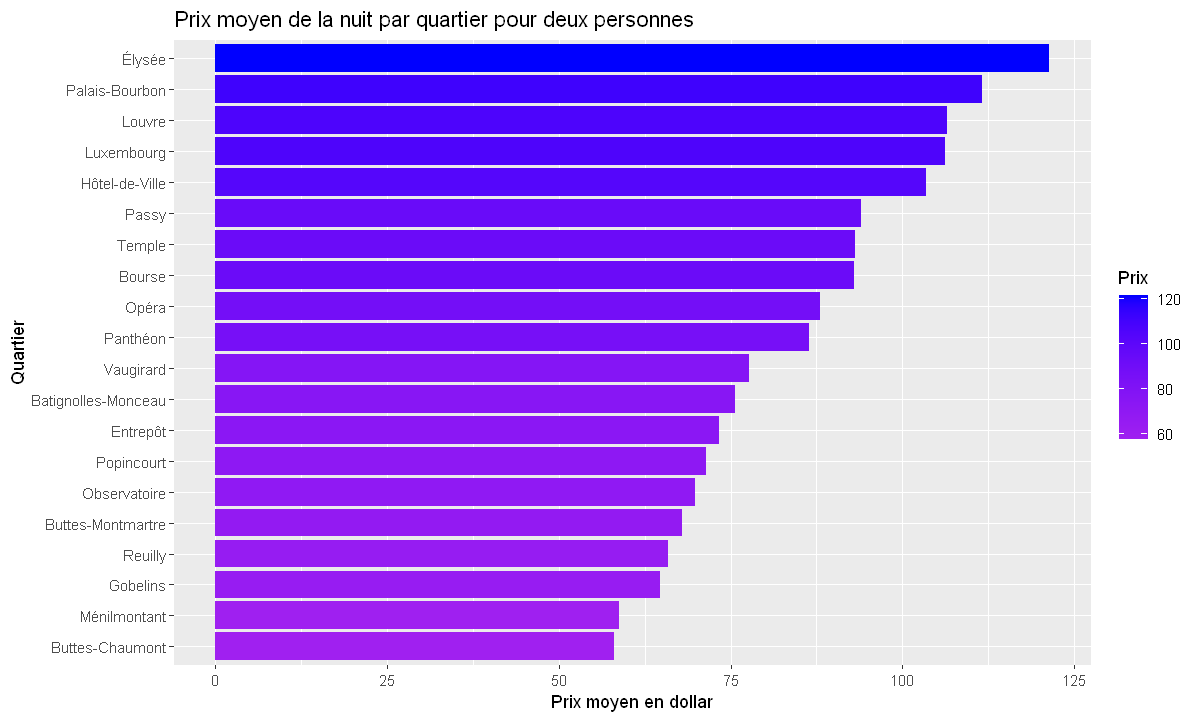

In [21]:
fig(10,6)

ggplot(price, aes(reorder(neighbourhood_cleansed, prix), prix, fill = prix)) +
geom_col() +
scale_fill_gradient(low = "purple", high = "blue", na.value = NA) +
coord_flip() +
labs(titles = "Prix moyen de la nuit par quartier pour deux personnes", x = "Quartier", y = "Prix moyen en dollar", fill = "Prix")


Il y a une réelle disparité de prix par quartier.

# Nombre d'annonces par date

In [22]:
y <- data.table::fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/data/calendar.csv.gz", encoding = "UTF-8")

In [23]:
head(y, 5)

listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2577,2020-10-19,f,$125.00,$125.00,3,1125
73533,2020-10-20,t,$95.00,$95.00,2,1125
73533,2020-10-21,t,$95.00,$95.00,2,1125
73533,2020-10-22,t,$95.00,$95.00,2,1125
73533,2020-10-23,t,$95.00,$95.00,2,1125


In [24]:
date <- y %>% select(available, date) %>% filter( available == "t") %>% group_by(date) %>% 
count(available) %>% arrange(date)

In [25]:
head(date)

date,available,n
2020-10-12,t,22
2020-10-13,t,38
2020-10-14,t,776
2020-10-15,t,3042
2020-10-16,t,5465
2020-10-17,t,7988


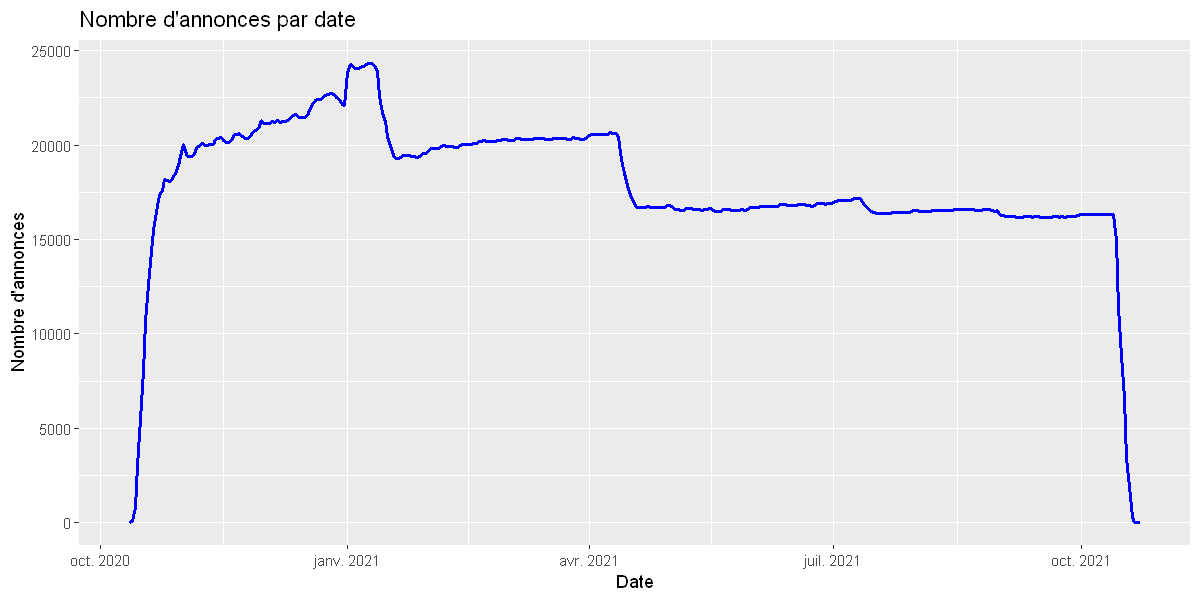

In [26]:
fig(10,5)
ggplot(date, aes(x = date, y = n)) +
geom_line(size = 1, color = 'blue') +
labs(titles = "Nombre d'annonces par date ", x = "Date", y = "Nombre d'annonces")

On observe une forme de saisonnalité dans la distribution du nombre d'annonces.

# Prix moyen pour deux personnes par date

In [27]:
x_test <- x %>% select(id, neighbourhood_cleansed, price, accommodates) %>%
filter(price != is.na(price), accommodates != is.na(price), accommodates == 2) 

In [28]:
head(x_test)

id,neighbourhood_cleansed,price,accommodates
3109,Observatoire,60,2
4886,Popincourt,89,2
5396,Hôtel-de-Ville,48,2
7964,Opéra,130,2
9359,Louvre,75,2
9952,Popincourt,75,2


In [29]:
y_test <- y %>% select(listing_id, available, date) %>% filter( available == "t")
names(y_test)[1] <- "id"
head(y_test)

id,available,date
73533,t,2020-10-20
73533,t,2020-10-21
73533,t,2020-10-22
73533,t,2020-10-23
73533,t,2020-10-24
73533,t,2020-10-25


In [30]:
join <- x_test %>% inner_join(y_test, by = 'id')

In [31]:
head(join)

id,neighbourhood_cleansed,price,accommodates,available,date
3109,Observatoire,60,2,t,2020-10-18
3109,Observatoire,60,2,t,2020-10-19
3109,Observatoire,60,2,t,2020-10-20
3109,Observatoire,60,2,t,2020-10-21
3109,Observatoire,60,2,t,2020-10-22
3109,Observatoire,60,2,t,2020-10-23


In [32]:
price2 <- join %>% select(date, price, accommodates) %>%
filter(price != is.na(price), accommodates != is.na(price), accommodates == 2) %>%
group_by(date) %>% 
summarise(prix = mean(price)) %>% arrange(prix)

`summarise()` ungrouping output (override with `.groups` argument)


In [33]:
tail(price2)

date,prix
2021-04-26,101.5161
2021-04-22,101.5298
2021-04-21,101.5540
2020-10-16,102.2571
2020-10-13,105.0833
2020-10-12,112.9333


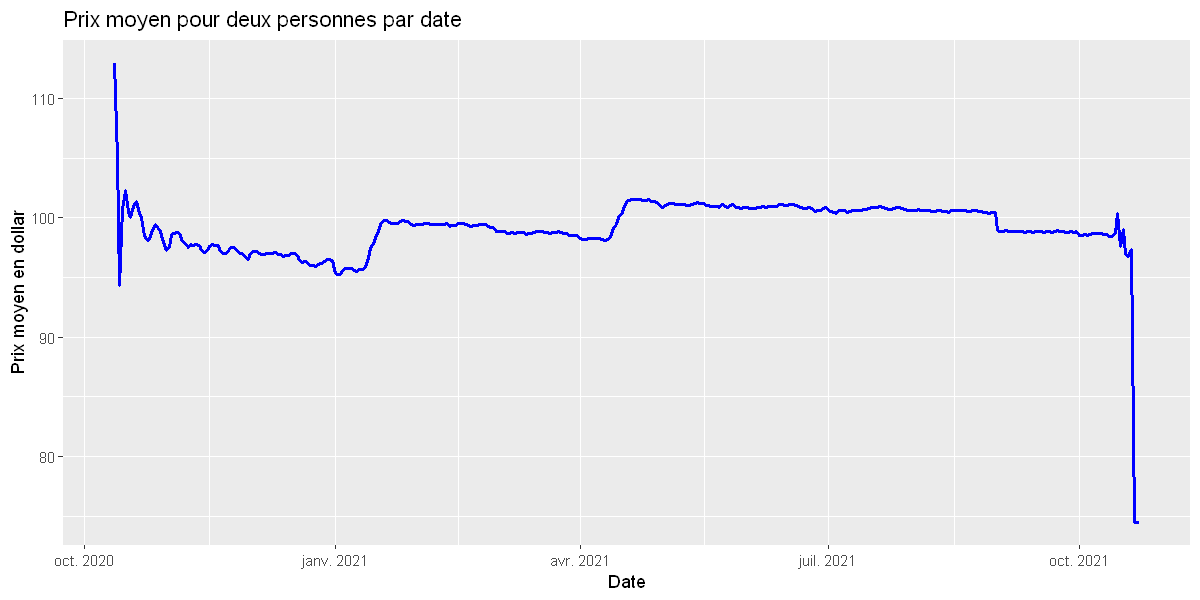

In [34]:
fig(10,5)
ggplot(price2, aes(date, prix)) +
geom_line(size = 1, color = 'blue') +
labs(titles = "Prix moyen pour deux personnes par date ", x = "Date", y = "Prix moyen en dollar")

Il semble y avoir une correlation inversée entre nombre d'annonces par date et prix moyen en dollar par date.

# Carte localisant les lieux de réservation

In [35]:
install.packages('leaflet')

also installing the dependencies 'lazyeval', 'yaml', 'xfun', 'mime', 'gridExtra', 'crosstalk', 'htmlwidgets', 'markdown', 'png', 'raster', 'sp', 'viridis', 'leaflet.providers'



package 'lazyeval' successfully unpacked and MD5 sums checked
package 'yaml' successfully unpacked and MD5 sums checked
package 'xfun' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'markdown' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'raster' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'leaflet.providers' successfully unpacked and MD5 sums checked
package 'leaflet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jeans\AppData\Local\Temp\RtmpyQRTML\downloaded_packages


In [36]:
library(leaflet)

Warning message:
"package 'leaflet' was built under R version 3.6.3"

In [37]:
z <- data.table::fread("http://data.insideairbnb.com/france/ile-de-france/paris/2020-10-12/visualisations/neighbourhoods.csv", encoding = "UTF-8")

In [38]:
leaflet()%>% 
    addProviderTiles('OpenStreetMap.HOT')%>%
    setView(lng = 2.3265614, lat =48.8599614, zoom = 12)%>%
    addMarkers(data=x, lng=~longitude, lat=~latitude, clusterOptions = markerClusterOptions())

HTML widgets cannot be represented in plain text (need html)

Cette carte permet de connaitre précisement tous les lieux de réservation.

# Carte du prix moyen de la nuit par quartier pour deux personnes

In [40]:
install.packages('rgdal')

package 'rgdal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jeans\AppData\Local\Temp\RtmpyQRTML\downloaded_packages


In [41]:
library(rgdal)

Warning message:
"package 'rgdal' was built under R version 3.6.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"rgdal: version: 1.5-19, (SVN revision 1092)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: C:/Users/jeans/Anaconda3/Lib/R/library/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: C:/Users/jeans/Anaconda3/Lib/R/library/rgdal/proj
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.


In [49]:
install.packages('curl')
library(curl)

package 'curl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jeans\AppData\Local\Temp\RtmpyQRTML\downloaded_packages


Warning message:
"package 'curl' was built under R version 3.6.3"

In [50]:
space <- rgdal::readOGR("https://www.data.gouv.fr/fr/datasets/r/4765fe48-35fd-4536-b029-4727380ce23c",encoding = "UTF-8")
class(space)

OGR data source with driver: GeoJSON 
Source: "https://www.data.gouv.fr/fr/datasets/r/4765fe48-35fd-4536-b029-4727380ce23c", layer: "4765fe48-35fd-4536-b029-4727380ce23c"
with 20 features
It has 9 fields, of which 1 list fields


[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [51]:
alpha <- data.table::fread("https://www.data.gouv.fr/fr/datasets/r/0d3553c6-45c0-4b16-82be-5ef314437d3e", encoding = "UTF-8")

In [52]:
price5 <- x %>% select(neighbourhood_cleansed, price, accommodates) %>%
filter(price != is.na(price), accommodates != is.na(price), accommodates == 2) %>%
group_by(neighbourhood_cleansed) %>% 
summarise(prix = mean(price)) 

`summarise()` ungrouping output (override with `.groups` argument)


In [53]:
price5$neighbourhood_cleansed <- factor(price5$neighbourhood_cleansed, levels = c('Opéra', 'Buttes-Montmartre', 'Batignolles-Monceau', 'Ménilmontant', 'Passy', 'Luxembourg', 'Reuilly', 'Vaugirard', 'Panthéon', 'Élysée', 'Louvre', 'Bourse', 'Buttes-Chaumont', 'Hôtel-de-Ville', 'Observatoire', 'Temple', 'Palais-Bourbon', 'Gobelins', 'Entrepôt', 'Popincourt'))

In [54]:
price5 <- price5 %>% arrange(price5$neighbourhood_cleansed)

In [55]:
m <- leaflet(space) %>%
  setView(lng = 2.3265614, lat =48.8599614, zoom = 12) %>%
  addProviderTiles('OpenStreetMap.HOT')

In [56]:
bins <- c(0, 25, 50, 75, 100, 125)
pal <- colorBin("Blues", domain = price5$prix , bins = bins)

labels <- sprintf(
  "<strong>%s</strong><br/>%g $</sup>",
  alpha$l_aroff, price5$prix
) %>% lapply(htmltools::HTML)

v <- m %>% addPolygons(
  fillColor = ~pal(price5$prix),
  weight = 2,
  opacity = 1,
  color = "white",
  dashArray = "3",
  fillOpacity = 0.7,
  highlight = highlightOptions(
    weight = 5,
    color = "#666",
    dashArray = "",
    fillOpacity = 0.7,
    bringToFront = TRUE),
  label = labels,
  labelOptions = labelOptions(
    style = list("font-weight" = "normal", padding = "3px 8px"),
    textsize = "15px",
    direction = "auto")) %>% 

    addLegend(pal = pal, values = price5$prix, opacity = 0.7, title = "Prix moyen par nuit",
    position = "bottomright")
v

HTML widgets cannot be represented in plain text (need html)

On peut constater que les prix les plus élevés se concentrent dans les zones centrales et ouest de Paris.

# Quelques analyses complémentaires :

# Carte des quartiers avec le plus d'annonces 

In [57]:
neighbour5 <- x %>% select(neighbourhood_cleansed, host_total_listings_count) %>% filter( host_total_listings_count != is.na( host_total_listings_count)) %>%
group_by(neighbourhood_cleansed) %>% 
summarise(listings = sum(host_total_listings_count)) %>% arrange(listings)

`summarise()` ungrouping output (override with `.groups` argument)


In [58]:
neighbour5$neighbourhood_cleansed <- factor(neighbour5$neighbourhood_cleansed, levels = c('Opéra', 'Buttes-Montmartre', 'Batignolles-Monceau', 'Ménilmontant', 'Passy', 'Luxembourg', 'Reuilly', 'Vaugirard', 'Panthéon', 'Élysée', 'Louvre', 'Bourse', 'Buttes-Chaumont', 'Hôtel-de-Ville', 'Observatoire', 'Temple', 'Palais-Bourbon', 'Gobelins', 'Entrepôt', 'Popincourt'))

In [59]:
neighbour5 <- neighbour5 %>% arrange(neighbour5$neighbourhood_cleansed)

In [60]:
bins <- c(0, 17500, 35000, 47500, 70000)
pal <- colorBin("Greens", domain = neighbour5$listings , bins = bins)

labels <- sprintf(
  "<strong>%s</strong><br/>%g Annonces</sup>",
  alpha$l_aroff, neighbour5$listings
) %>% lapply(htmltools::HTML)

w <- m %>% addPolygons(
  fillColor = ~pal(neighbour5$listings),
  weight = 2,
  opacity = 1,
  color = "white",
  dashArray = "3",
  fillOpacity = 0.7,
  highlight = highlightOptions(
    weight = 5,
    color = "#666",
    dashArray = "",
    fillOpacity = 0.7,
    bringToFront = TRUE),
  label = labels,
  labelOptions = labelOptions(
    style = list("font-weight" = "normal", padding = "3px 8px"),
    textsize = "15px",
    direction = "auto")) %>% 

    addLegend(pal = pal, values = price5$prix, opacity = 0.7, title = "Nombre d'annonces",
    position = "bottomright")
w

HTML widgets cannot be represented in plain text (need html)

On peut observer que la concentration des offres se situe principalement sur la rive droite de Paris.

Le quartier de Vaugirard est quant à lui celui regroupant le plus d'offre sur la rive gauche.

# Les biens les mieux notés par quartier

In [61]:
note <- x %>% select(neighbourhood_cleansed, review_scores_value) %>% 
filter( review_scores_value != is.na( review_scores_value)) %>%
group_by(neighbourhood_cleansed) %>% 
summarise(note = mean(review_scores_value)) %>% arrange(note)

`summarise()` ungrouping output (override with `.groups` argument)


In [62]:
tail(note)

neighbourhood_cleansed,note
Entrepôt,9.304015
Popincourt,9.317021
Reuilly,9.317499
Buttes-Montmartre,9.318887
Buttes-Chaumont,9.328666
Ménilmontant,9.347707


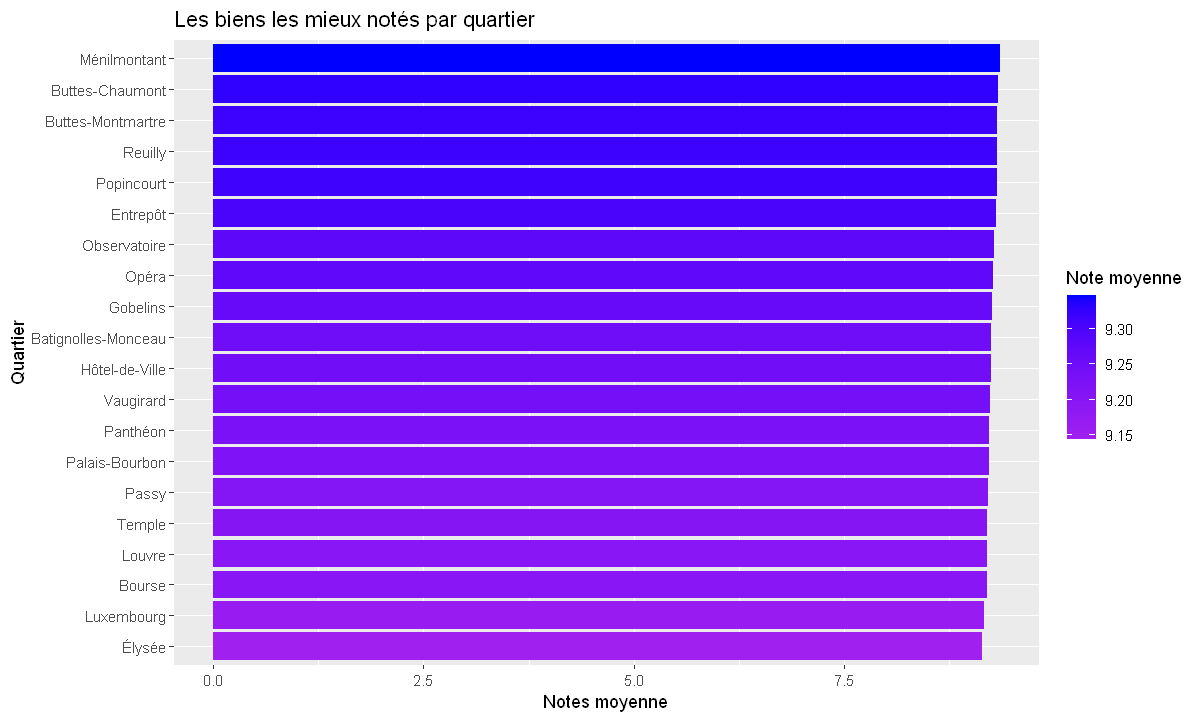

In [63]:
fig(10,6)
ggplot(note, aes(reorder(neighbourhood_cleansed, note), note, fill = note)) +
geom_col() +
scale_fill_gradient(low = "purple", high = "blue", na.value = NA) +
coord_flip() +
labs(titles = "Les biens les mieux notés par quartier", x = "Quartier", y = "Notes moyenne", fill = "Note moyenne")

Les notes par quartier ne semblent pas donner d'information significative car trop uniforme.

# Les quartiers où les hôtes répondent le plus rapidement

In [64]:
time <- x %>% select(neighbourhood_cleansed, host_response_time) %>% 
filter( host_response_time != is.na( host_response_time), host_response_time == 'within an hour') %>%
group_by(neighbourhood_cleansed) %>% 
count(host_response_time) %>% arrange(n)

In [65]:
tail(time, 5)

neighbourhood_cleansed,host_response_time,n
Entrepôt,within an hour,1008
Vaugirard,within an hour,1044
Temple,within an hour,1054
Popincourt,within an hour,1192
Buttes-Montmartre,within an hour,1255


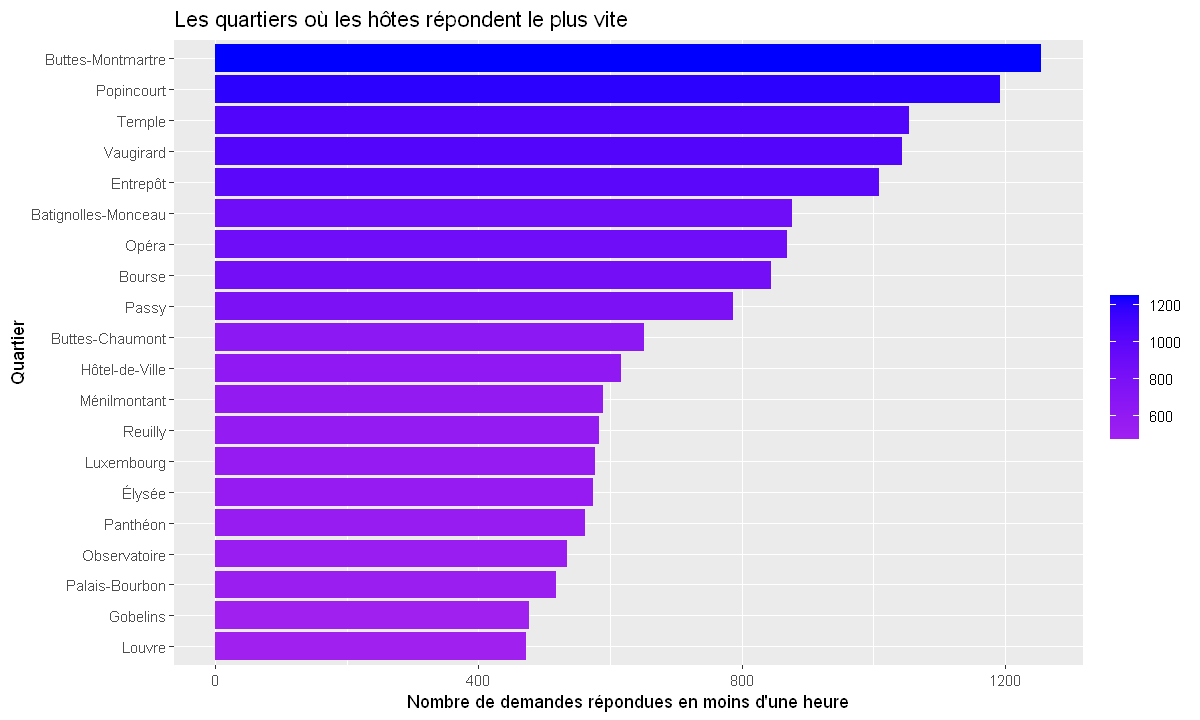

In [66]:
fig(10,6)
ggplot(time, aes(reorder(neighbourhood_cleansed, n), n, fill = n)) +
geom_col() +
scale_fill_gradient(low = "purple", high = "blue", na.value = NA) +
coord_flip() +
labs(titles = "Les quartiers où les hôtes répondent le plus vite", x = "Quartier", y = "Nombre de demandes répondues en moins d'une heure", fill = "")

Il a une rélle différence de rapidité de réponse entre les hôtes des différents quartiers.

C'est un facteur important à prendre en compte dans la formation d'une stratégie d'investissement immobilière, afin d'être meilleur que la concurrence.

# Quand est ce que les hôtes sont arrivés sur l'application ?

In [67]:
since <- x %>% select(host_since) %>% group_by(host_since) %>% count(host_since) %>% filter(n <= 75)
head(since)

host_since,n
2008-08-30,1
2008-09-09,1
2008-10-14,1
2009-01-16,11
2009-02-14,1
2009-03-08,1


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

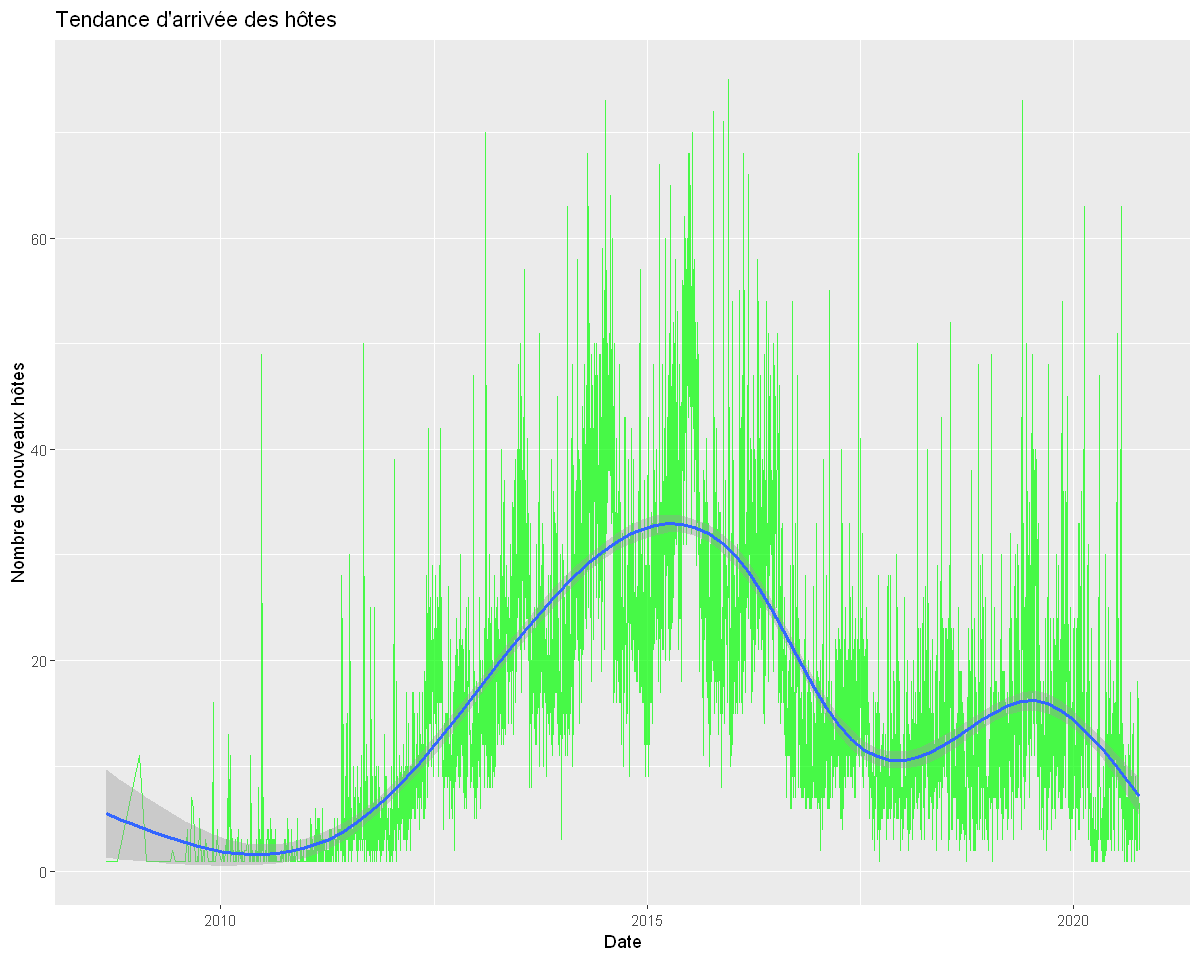

In [68]:
fig(10, 8)
ggplot(since, aes(host_since, n)) +
geom_line(size = 0.1, color = 'green', alpha = 0.7) +
geom_smooth() +
labs(titles = "Tendance d'arrivée des hôtes", x = "Date", y = "Nombre de nouveaux hôtes")

On remarquer un grand pic de la courbe en 2015, ce qui montre à quelle date l'application est devenue très populaire.

On peut aussi remarquer une deuxième tendance de hausse en 2019.